# Insurance Premium Prediction

In [1]:
#importing the dependencies
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


#### Numpy-is used for working with arrays

#### Pandas- is an open source library mainly made for working with relational or labeled data easily.

#### Matplotlib-is used to create 2D graphs and plots by using module name pyplot which makes easy for plotting.

#### Sklearn (Scikit-learn)-is used to provide a selection of efficient tools for ML and statistical modeling including classification, regression and clustering.  

#### Seaborn- is a data visualization library based on matplotlib.it provides high level interface for drawing attractive and informative graphics.

#### Metrics-It is used to measure the performance of the model.

In [2]:
#loading the data from csv file
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 1.The pd.read_csv will read csv file and load the content to pandas dataframe(df) we can print the first 5 rows of the dataframe by df.head() function


In [3]:
#number of rows and columns
df.shape

(1332, 7)

#### 2.Shape function gives number of rows and columns in dataset.(it comprises of 1332 records with 6 attributes)

In [4]:
#getting information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1332 non-null   int64  
 1   sex       1332 non-null   object 
 2   bmi       1332 non-null   float64
 3   children  1332 non-null   int64  
 4   smoker    1332 non-null   object 
 5   region    1332 non-null   object 
 6   charges   1332 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.0+ KB


#### 3.info() method prints the information about the dataframe. The information contains the no.of columns,column labels,Data types,Memory usage,range index and no.of cells in each column (non-null-values).info()Actually prints the info Categorical features:sex,smoker,region

In [5]:
#checking for missing values
missing_values_count=df.isnull().sum()
missing_values_count

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 4.checking null values sum in each column. Here in this model we dont have missing values so we can proceed with further operations.if we have missing values we have to handle it.


In [6]:
print("labels of insurance:\n{}".format(df.keys()))

labels of insurance:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [7]:
print("charges:{}".format(df['charges']))

charges:0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1327     2007.94500
1328    29141.36030
1329        0.00000
1330        0.00000
1331        0.00000
Name: charges, Length: 1332, dtype: float64


In [8]:
#statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1332.000000,1332.000000,1332.000000,1332.000000
mean,38.944444,30.417830,1.093093,13221.419637
std,14.396914,6.634096,1.203069,12145.486181
min,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.166250,0.000000,4683.139575
50%,39.000000,30.275000,1.000000,9303.297725
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


#### 5.describe() method returns the description of the data in the dataframe.

If the data contains the numerical data,the description contains these information for 
each column: 
Count:the number of non empty values.
Mean: the average (mean) value.
Std: standard deviation-it is a measure of how spread out the data is. A large standard 
deviation indicates that data is spread out and the small standard deviation indicates that 
data is clustered closely around the mean.
25%- values are less than 25% percentile
50%-  values are less than 50% percentile
75%- values are less than 75% percentile
Max-The maximum value

#### DISTRIBUTION GRAPH

The Distribution graph represents the probability distribution of a random variable. if the variable is discrete,then

the probability of each value of random variable is read frrom the graph and it tells you how often each value occurs.


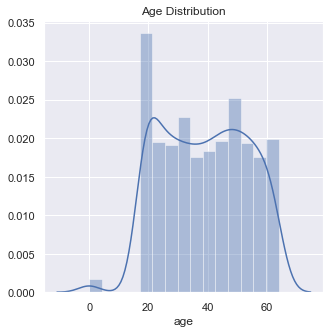

In [9]:
#distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

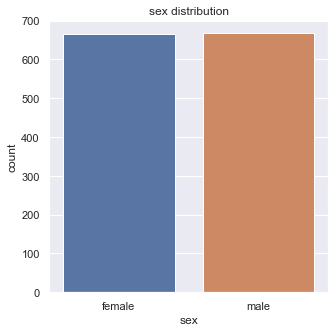

In [10]:
#Gender column
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df)
plt.title('sex distribution')
plt.show()

In [11]:
#to know exact number of female and male
df['sex'].value_counts()

male      667
female    665
Name: sex, dtype: int64

countplot() method is used to show the counts of observtions in each categorical bin using bars

value_counts()function returns object containing counts of unique values

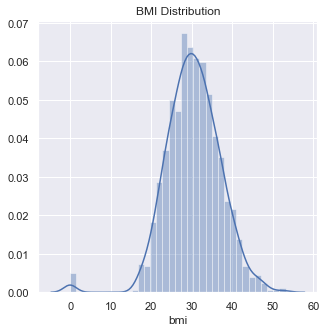

In [12]:
#BMI distribution 
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range ->18.5 to 24.9

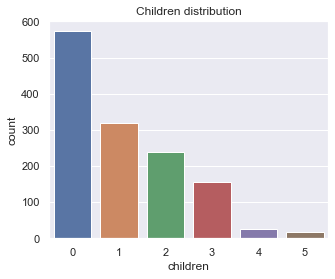

In [13]:
#children distribution
plt.figure(figsize=(5,4))
sns.countplot(x='children',data=df)
plt.title('Children distribution')
plt.show()

In [14]:
df['children'].value_counts()
#value_counts function is used to print no.of values in particular element
#here 570 members are with 0 children
#320 mem with 1 child,240 with 2 children,3 with 157,4 with 25,5 with 17

0    573
1    320
2    240
3    157
4     25
5     17
Name: children, dtype: int64

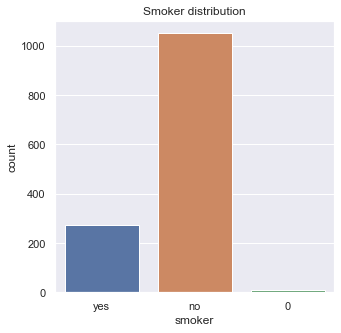

no     1049
yes     273
0        10
Name: smoker, dtype: int64

In [15]:
#smoker distribution 
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('Smoker distribution')
plt.show()
df['smoker'].value_counts()

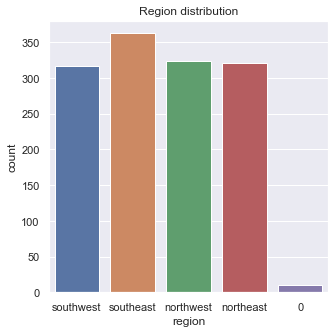

southeast    362
northwest    324
northeast    320
southwest    316
0             10
Name: region, dtype: int64

In [16]:
#Region Distribution 
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('Region distribution')
plt.show()
df['region'].value_counts()


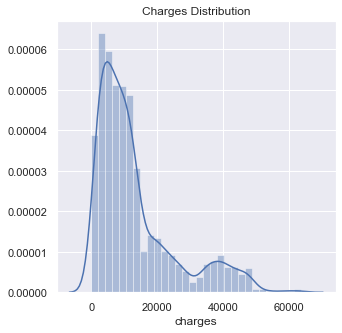

In [17]:
#Charges Distribution
plt.figure(figsize=(5,5))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()


Here the age,bmi,children are in the integer form and it can perform the distribution graph and here sex is the categorical feature and hence it cant perform the distribution graph so to make it we have to convert the string format into the integer. To convert the datatype we use somany methods like Labelencoder,dummie variables,replace,mapping etc..
Here we simply use labelencoder method.

#### Encoding the categorical features 


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
le_smoker=LabelEncoder()
le_region=LabelEncoder()
df["Sex"]=le_sex.fit_transform(df["sex"])
df["Smoker"]=le_sex.fit_transform(df["smoker"])
df["Region"]=le_sex.fit_transform(df["region"])
ds=df.drop(labels=["sex","smoker","region"],axis=1)
ds.head()
#sex=female-0,male-1
#smoker=no-1,yes-2
#Region=Northeast-1,Northwest-2,Southeast-3,Southwest-4

,age,bmi,children,charges,Sex,Smoker,Region
0,19,27.900,0,16884.92400,0,2,4
1,18,33.770,1,1725.55230,1,1,3
2,28,33.000,3,4449.46200,1,1,3
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


### Splitting the features and target

In [19]:
insurance_features=['age','Sex','bmi','children','Smoker','Region']


In [20]:
X=ds[insurance_features]

In [21]:
Y=ds.charges

In [22]:
print(X)

      age  Sex     bmi  children  Smoker  Region
0      19    0  27.900         0       2       4
1      18    1  33.770         1       1       3
2      28    1  33.000         3       1       3
3      33    1  22.705         0       1       2
4      32    1  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1327   21    0  25.800         0       1       4
1328   61    0  29.070         0       2       2
1329    0    0   0.000         0       0       0
1330    0    0   0.000         0       0       0
1331    0    0   0.000         0       0       0

[1332 rows x 6 columns]


In [23]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1327     2007.94500
1328    29141.36030
1329        0.00000
1330        0.00000
1331        0.00000
Name: charges, Length: 1332, dtype: float64


Splitting the data into Testing and Training Data

In [24]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [25]:
X_train

,age,Sex,bmi,children,Smoker,Region
397,33,0,24.310,0,1,3
739,47,0,36.000,1,1,4
448,57,0,30.495,0,1,2
201,35,1,27.740,2,2,1
265,50,1,27.455,1,1,1
...,...,...,...,...,...,...
466,61,1,28.310,1,2,2
299,58,1,34.865,0,1,1
493,51,1,23.210,1,2,3
527,33,0,38.900,3,1,4


In [26]:
Y_train

397      4185.09790
739      8556.90700
448     11840.77505
201     20984.09360
265      9617.66245
           ...     
466     28868.66390
299     11944.59435
493     22218.11490
527      5972.37800
1192     8733.22925
Name: charges, Length: 1065, dtype: float64

In [27]:
X_test

,age,Sex,bmi,children,Smoker,Region
682,47,1,36.200,1,1,4
1279,20,1,39.400,2,2,4
356,49,0,30.780,1,1,1
711,51,0,40.660,0,1,1
17,0,0,0.000,0,0,0
...,...,...,...,...,...,...
612,37,1,34.100,4,2,4
455,19,1,25.175,0,1,2
411,64,1,33.880,0,2,3
535,54,1,30.210,0,1,2


In [28]:
Y_train

397      4185.09790
739      8556.90700
448     11840.77505
201     20984.09360
265      9617.66245
           ...     
466     28868.66390
299     11944.59435
493     22218.11490
527      5972.37800
1192     8733.22925
Name: charges, Length: 1065, dtype: float64

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(1332, 6) (1065, 6) (267, 6)


# Linear Regression

### Regression: regression searches the relationship among the variables.

### Multiple Linear regression: Linear regression is probably one of the most important and widely used regression methods, it is also known as MLR,it is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. MLR is an extension of Linear regression(OLS)
Equation: Y=B0+B1X1+B2X2--------BNXN+E

In [30]:
#loading linear regression
model=LinearRegression()
model.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#prediction on training data
train_data_prediction=model.predict(X_train)

In [32]:
#R squared value
r2_train=metrics.r2_score(Y_train,train_data_prediction)
print('r2 value for trained set:',r2_train)

r2 value for trained set: 0.7119153986231745


In [33]:
#predection on test data
test_data_prediction=model.predict(X_test)

In [34]:
#R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('r2 value for testing set:',r2_test)

r2 value for testing set: 0.6791966718028664


In [35]:
Y_pred=model.predict(X)

In [36]:
Y_pred

array([ 25043.23096437,   4196.49096376,   7017.92274713, ...,
       -26577.49373477, -26577.49373477, -26577.49373477])

here we have to give x values(age,sex,bmi,children?,somker,region)as input then it predicts the output Y

In [37]:
print("The charges require for the given data\n")
print(model.predict([[19,0,27.900,0,2,4]]))

The charges require for the given data

[25043.23096437]


In [38]:
model.predict([[0,0,0,0,0,0]])

array([-26577.49373477])

# RandomForest Regression

### Random forest is a supervised machine learning algorithm made up of decision trees.Random Forest is used in both Classification and regression . It uses ensemble learning method for regression
(ENSEMBLE: it is a machine learning technique that combines several base models in order to produce one predictive model)

In [39]:
#loading random forest regressor
model1=RandomForestRegressor()
model1.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
#prediction of train data
train_data_prediction=model1.predict(X_train)

In [41]:
#r suare value
r2_train=metrics.r2_score(Y_train,train_data_prediction)
print('r2 value for trained set:',r2_train)

r2 value for trained set: 0.9761974927894421


In [42]:
#predicting the test data
test_data_prediction=model1.predict(X_test)

In [43]:
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('r2 value for testing set:',r2_test)

r2 value for testing set: 0.9777091699428925


In [44]:
Y_pred=model1.predict(X)
Y_pred

array([16944.4322603,  2528.8817368,  4735.044751 , ...,     0.       ,
           0.       ,     0.       ])

here we have to give x values(age,sex,bmi,children?,somker,region)as input then it predicts the output Y

In [45]:
print("The charges require for the given data\n")
print(model1.predict([[19,0,27.900,0,2,4]]))

The charges require for the given data

[16944.4322603]


In [46]:
model1.predict([[0,0,0,0,0,0]])

array([0.])

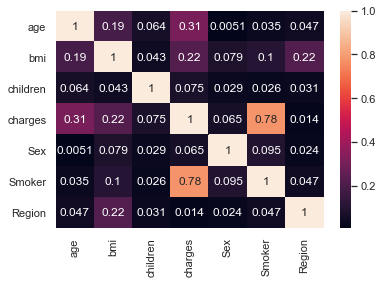

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(ds.corr(),annot=True)

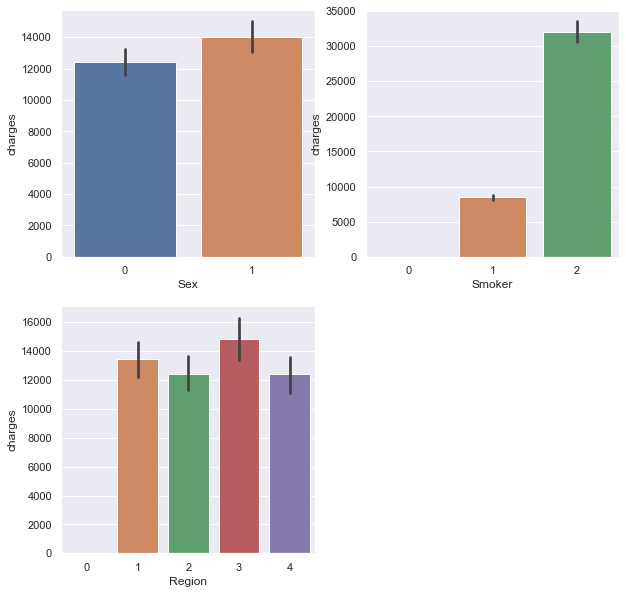

In [48]:
plt.figure(figsize=(10,10))
for i,feat in enumerate(['Sex','Smoker','Region']):
    plt.subplot(2,2,i+1)
    sns.barplot(x=ds[feat],y=ds.charges)
plt.show()

Observations: -

expenses doesnot varies much with respect to 'sex' feature

Smoker has to pay more than Non-Smoker

expenses doesnot varies much with respect to 'region' feature

Findings :-

Older people has to pay more premium than younger ones

Higher BMI persons has to pay more than lower ones

# TASK
Predicting the insurance charges of LIC INSURANCE company

In this model it consists of 1330 rows, First we have trained first 1000 rows and predict LIC insurance from remaining 330 rows

In [49]:
ds.rename(columns={'charges':'LIC Insurance'},inplace=True)
ds

,age,bmi,children,LIC Insurance,Sex,Smoker,Region
0,19,27.900,0,16884.92400,0,2,4
1,18,33.770,1,1725.55230,1,1,3
2,28,33.000,3,4449.46200,1,1,3
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2
...,...,...,...,...,...,...,...
1327,21,25.800,0,2007.94500,0,1,4
1328,61,29.070,0,29141.36030,0,2,2
1329,0,0.000,0,0.00000,0,0,0
1330,0,0.000,0,0.00000,0,0,0


In [50]:
d1=ds[0:1000]
x=ds.drop(columns="LIC Insurance",axis=1)
y=ds["LIC Insurance"]
print(x)
print(y)
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2,random_state=2)


      age     bmi  children  Sex  Smoker  Region
0      19  27.900         0    0       2       4
1      18  33.770         1    1       1       3
2      28  33.000         3    1       1       3
3      33  22.705         0    1       1       2
4      32  28.880         0    1       1       2
...   ...     ...       ...  ...     ...     ...
1327   21  25.800         0    0       1       4
1328   61  29.070         0    0       2       2
1329    0   0.000         0    0       0       0
1330    0   0.000         0    0       0       0
1331    0   0.000         0    0       0       0

[1332 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1327     2007.94500
1328    29141.36030
1329        0.00000
1330        0.00000
1331        0.00000
Name: LIC Insurance, Length: 1332, dtype: float64


In [51]:
x1_train,x1_test

(      age     bmi  children  Sex  Smoker  Region
 397    33  24.310         0    0       1       3
 739    47  36.000         1    0       1       4
 448    57  30.495         0    0       1       2
 201    35  27.740         2    1       2       1
 265    50  27.455         1    1       1       1
 ...   ...     ...       ...  ...     ...     ...
 466    61  28.310         1    1       2       2
 299    58  34.865         0    1       1       1
 493    51  23.210         1    1       2       3
 527    33  38.900         3    0       1       4
 1192   46  40.375         2    1       1       2
 
 [1065 rows x 6 columns],
       age     bmi  children  Sex  Smoker  Region
 682    47  36.200         1    1       1       4
 1279   20  39.400         2    1       2       4
 356    49  30.780         1    0       1       1
 711    51  40.660         0    0       1       1
 17      0   0.000         0    0       0       0
 ...   ...     ...       ...  ...     ...     ...
 612    37  34.100    

In [52]:
y1_train,y1_test

(397      4185.09790
 739      8556.90700
 448     11840.77505
 201     20984.09360
 265      9617.66245
            ...     
 466     28868.66390
 299     11944.59435
 493     22218.11490
 527      5972.37800
 1192     8733.22925
 Name: LIC Insurance, Length: 1065, dtype: float64,
 682      8068.18500
 1279    38344.56600
 356      9778.34720
 711      9875.68040
 17          0.00000
            ...     
 612     40182.24600
 455      1632.03625
 411     46889.26120
 535     10231.49990
 653      5148.55260
 Name: LIC Insurance, Length: 267, dtype: float64)

In [53]:
model1.fit(x1_train,y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
train_data_prediction=model1.predict(x1_train)

In [55]:
r2_train=metrics.r2_score(y1_train,train_data_prediction)
print('r2 value for trained set:',r2_train)

r2 value for trained set: 0.9769997334108965


In [56]:
test_data_prediction=model1.predict(x1_test)

In [57]:
r2_test=metrics.r2_score(y1_test,test_data_prediction)
print('r2 value for testing set:',r2_test)

r2 value for testing set: 0.8406780364742376


In [58]:
y_pred=model1.predict(x)
y_pred

array([17002.5051143,  2695.2445794,  6669.6371577, ...,    21.964732 ,
          21.964732 ,    21.964732 ])

In [59]:
print("The charges require for the given data\n")
print(model1.predict([[19,0,27.900,0,2,4]]))

The charges require for the given data

[16443.559429]


In [60]:

print("The charges require for the given data\n")
print(model1.predict([[61,0,29.07,0,2,2]]))

The charges require for the given data

[26691.3043726]


#### K.BHAGYA SRI
S180319

CSE-2C